In [1]:
import pymysql
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
def my_db():
    global db
    db = pymysql.connect(host='192.168.0.102',
                         port=3306,
                         user='cnu',
                         passwd='cnu123',
                         db='ner_core_tagging',
                         charset='utf8')


def link_bio(result):
    global string
    try:
        for i in range(len(result)):
            if result[i][1] == 'B':
                string = string + " " + result[i][0]

            elif result[i][1] == 'I':

                if result[i + 1][1] == 'B':
                    string = string + result[i][0] + " "
                else:
                    string = string + result[i][0]
    except:
        pass


def show_wordcloud(string):
    global wordcloud
    wordcloud = WordCloud(font_path='font/H2GTRE.TTF', background_color='white').generate(string)
    plt.figure(figsize=(22, 22))  # 이미지 사이즈 지정
    plt.imshow(wordcloud, interpolation='lanczos')  # 이미지의 부드럽기 정도
    plt.axis('off')  # x y 축 숫자 제거
    plt.show()
    # plt.savefig()


def run(sql):
    my_db()
    global cursor, string
    try:
        with db.cursor() as cursor:

            cursor.execute(sql)
            result = cursor.fetchall()
            string = ""
            new_result=[[0]*2 for _ in range(len(result))]

            for i in range(len(result)):
                new_result[i][0]=result[i][1]
                new_result[i][1]=result[i][2]
            print(new_result)
            link_bio(new_result)

            # string= list(string.split(" "))
            # while "" in string:
            #    string.remove("")
            print(string)  # string 배열 완성

            show_wordcloud(string)
    finally:
        db.close()



[['비위', 'B'], ['첩보', 'B'], ['선거개입', 'B'], ['하명수사', 'B'], ['낙선', 'B'], ['공공병원', 'B'], ['금융거래', 'B'], ['북녘', 'B'], ['선거운동', 'B'], ['프로농구', 'B'], ['정규리그', 'I'], ['홈경기', 'I'], ['홈경기', 'B'], ['턴오버', 'B'], ['마이크', 'B'], ['앞', 'B'], ['딥페이크', 'B'], ['비상전력공급장', 'B'], ['치', 'I'], ['UPS', 'B'], ['D', 'B'], ['램', 'I'], ['남측', 'B'], ['SNS', 'B'], ['이메일', 'B'], ['온라인', 'B'], ['스마트폰', 'B'], ['메일', 'B'], ['동북', 'B'], ['전후', 'B'], ['메탈지그', 'B'], ['타이라바', 'B'], ['위', 'B'], ['벤치마킹', 'B'], ['SNS', 'B'], ['브로드웨이', 'B'], ['트위터', 'B'], ['ARS', 'B'], ['RDD', 'B'], ['비례할당무작위추출', 'B'], ['표본오차', 'B'], ['신뢰수준', 'B'], ['홈페이지', 'B'], ['가중값', 'B'], ['국정', 'B'], ['남북관계', 'B'], ['사회통합', 'B'], ['정당투표', 'B'], ['유튜브', 'B'], ['캡처', 'B'], ['e', 'B'], ['커머스', 'I'], ['전자상거래', 'B'], ['서비스', 'I'], ['우먼스', 'B'], ['저스트', 'I'], ['두', 'I'], ['캠페인', 'I'], ['유튜브', 'B'], ['소셜네트워크서비스', 'B'], ['SNS', 'B'], ['인스타그램', 'B'], ['혈중알코올농', 'B'], ['도', 'I'], ['스폿', 'B'], ['spot', 'I'], ['단속', 'B'], ['퇴직위로금', 'B'], ['단기계약직', 'B'], ['사회', 'B'], 

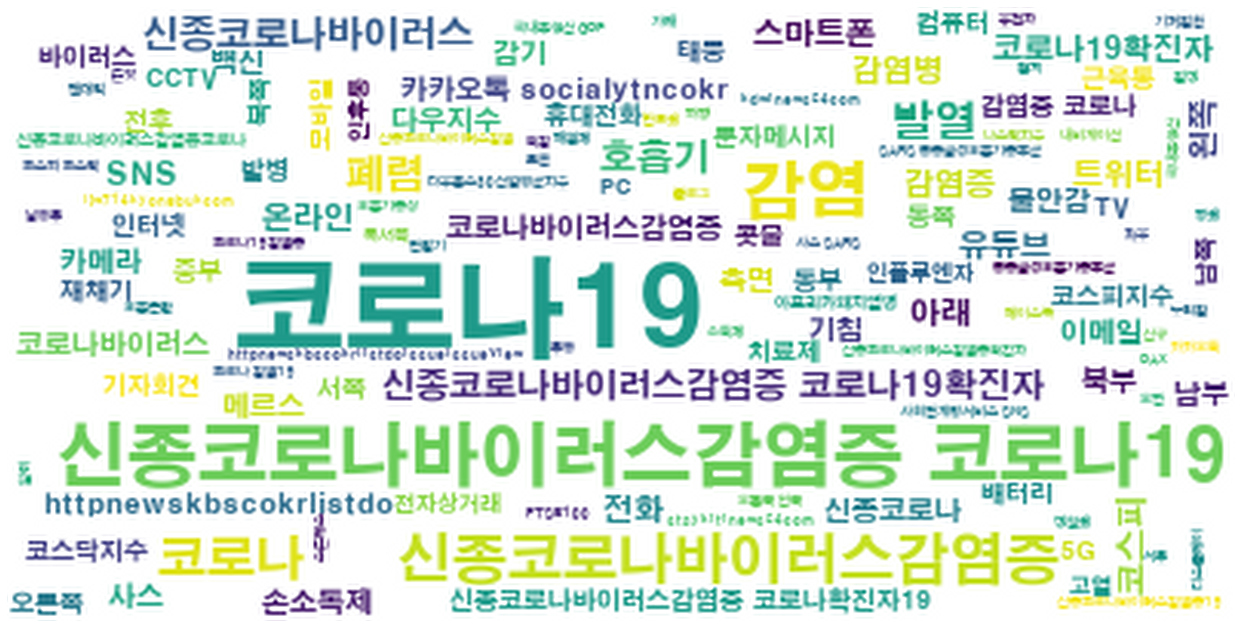

In [3]:
trm = """
        select distinct(NEWS_SEQ),NER_CNTNTS, bio from ner_ner_info
        where USE_AT='y' and (bio='B' or bio='I') and NER_TYPE ='TRM' and MORP_SEQ is not null
        order by MORP_SEQ;     
        """

run(trm)

[['지방선거', 'B'], ['사건', 'B'], ['경선', 'B'], ['총선', 'B'], ['총선', 'B'], ['대선', 'B'], ['연쇄살인사건', 'B'], ['실종', 'B'], ['사건', 'I'], ['사건', 'B'], ['총선', 'B'], ['연합훈련', 'B'], ['무역전쟁', 'B'], ['개막전', 'B'], ['글로벌', 'B'], ['금융위기', 'I'], ['무역분쟁', 'B'], ['총파업', 'B'], ['행정고시', 'B'], ['총선', 'B'], ['선거', 'B'], ['총선', 'B'], ['선거', 'B'], ['사건', 'B'], ['시민보고회', 'B'], ['공모', 'B'], ['4', 'B'], ['차산업혁명', 'I'], ['아태마스터스대회', 'B'], ['새만금', 'B'], ['잼버리', 'B'], ['총선', 'B'], ['2', 'B'], ['총선', 'B'], ['총선', 'B'], ['대선', 'B'], ['지방선거', 'B'], ['총선', 'B'], ['일제강점기', 'B'], ['동남아시안게임', 'B'], ['시무식', 'B'], ['그룹', 'B'], ['시무식', 'I'], ['신년사', 'B'], ['신년인사회', 'B'], ['5', 'B'], ['18', 'I'], ['민주화운동', 'I'], ['민족주의', 'B'], ['가습기살균', 'B'], ['제', 'I'], ['사건', 'I'], ['반유대주의', 'B'], ['총선', 'B'], ['2', 'B'], ['차대전', 'I'], ['2', 'I'], ['산업기술보호법', 'B'], ['상견례', 'B'], ['월드컵', 'B'], ['시상식', 'B'], ['4', 'B'], ['15', 'I'], ['총선', 'I'], ['장외투쟁', 'B'], ['정전사태', 'B'], ['전쟁', 'B'], ['4', 'B'], ['15', 'I'], ['총선', 'I'], ['총선', 'B'], ['3', 'B'],

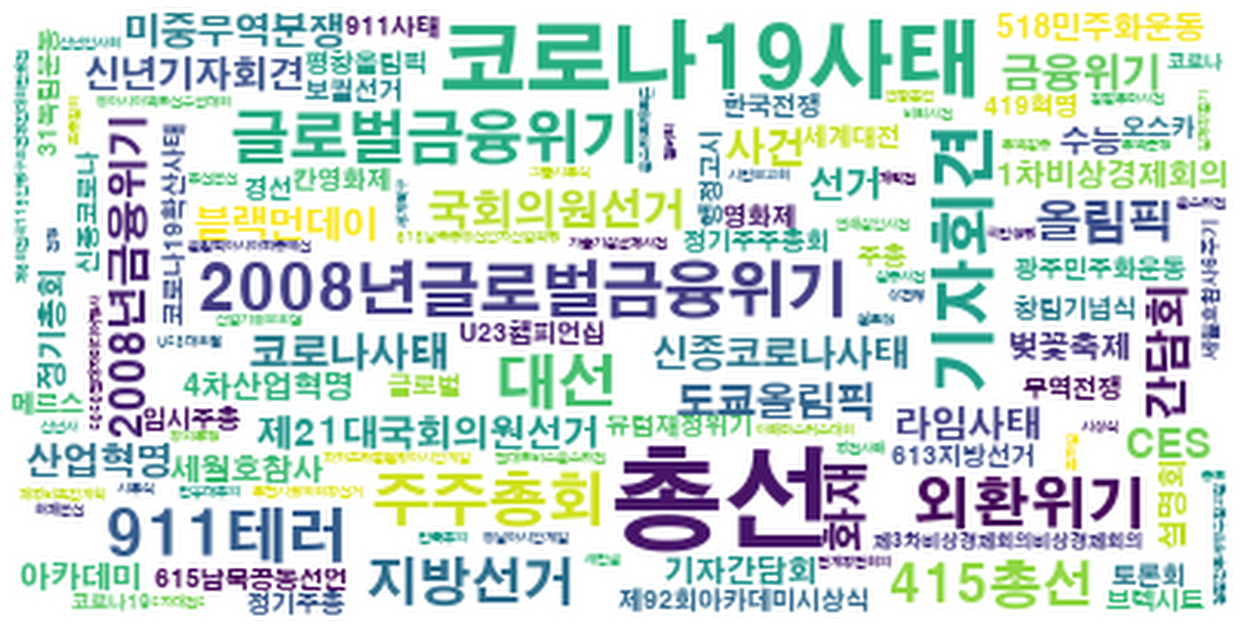

In [4]:
evt = """
        select distinct(NEWS_SEQ),NER_CNTNTS, bio from ner_ner_info
        where USE_AT='y' and (bio='B' or bio='I') and NER_TYPE ='EVT' and MORP_SEQ is not null
        order by MORP_SEQ;
        """
run(evt)